# Summit County Sales Data sorted by Edgewood and Cascade Village (half mile boundaries) and Akron City

In [470]:
import pandas as pd
import numpy as np
from dateutil.parser import parse
import matplotlib.pyplot as plt
%matplotlib inline

# load the sales data, parsing the date
df = pd.read_csv('master.csv')

plt.style.use('fivethirtyeight')

In [471]:
def bar_plot(dist, name):
    plt.figure(figsize=(9,3))
    y_pos = np.arange(len(dist.index))
    plt.bar(y_pos, dist.values, align='center', alpha=0.6)
    plt.xticks(y_pos, dist.index)
    plt.xlabel('sale_valid code')
    plt.title(name+' Commercial Sales')
    plt.gca().xaxis.grid(False)
    plt.annotate("Sales by category, 1997-2014", (0,0), (0, -50), xycoords='axes fraction', textcoords='offset points', va='top')
    plt.savefig('charts/commercial_sale_valid_count_bar.png',bbox_inches='tight')

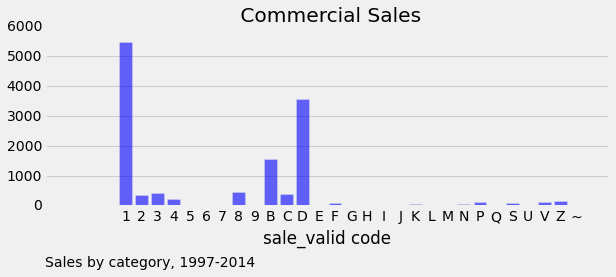

In [472]:
cats = df.loc[(df.year>1996) & (df.CLASS=='C') & (df.sale_price.notnull()),['sale_price', 'sale_valid']].groupby('sale_valid').count()    
bar_plot(cats, '')
# cats.to_csv('charts/commercial_sale_valid_count.csv')

In [473]:
df.loc[(df.year>1996) & (df.CLASS=='C') & (df.sale_price.notnull()),['sale_price', 'sale_valid']]\
    .groupby('sale_valid').agg(np.median).to_csv('charts/commercial_sale_valid_median_price.csv')

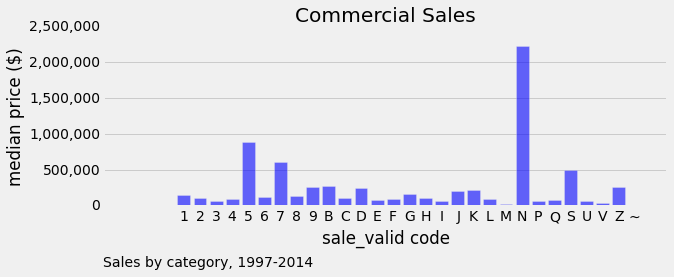

In [474]:
cats = df.loc[(df.year>1996)  & (df.CLASS=='C') & (df.sale_price.notnull()),['sale_price', 'sale_valid']].groupby('sale_valid').agg(np.median)    

plt.figure(figsize=(9,3))
ax = plt.subplot(111)
y_pos = np.arange(len(cats.index))
plt.bar(y_pos, cats.values, align='center', alpha=0.6)
plt.xticks(y_pos, cats.index)
plt.xlabel('sale_valid code')
plt.ylabel('median price ($)')
plt.title('Commercial Sales')
ax.get_yaxis().set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.gca().xaxis.grid(False)
plt.annotate("Sales by category, 1997-2014", (0,0), (0, -50), xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig('charts/commercial_sale_valid_median_price_bar.png',bbox_inches='tight')

(-100, 2200)

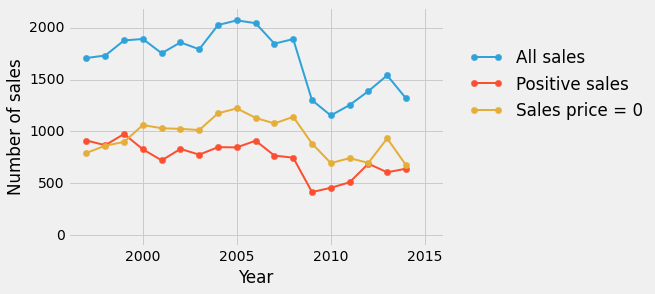

In [475]:
positive = df[(df.sale_price>0) & (df.year > 1996) & (df.year < 2015) & (df.CLASS=='C')].groupby('year').size()
# custom = df[(df.sale_valid.isin(custom_valid)) & (df.sale_price>0) & (df.year > 1996) & (df.year < 2015) & (df.CLASS=='C')].groupby('year').size()
all_sales = df[(df.year > 1996) & (df.year < 2015) & (df.CLASS=='C')].groupby('year').size()
data = positive.values*1.0/all_sales*100

chart1 = pd.DataFrame(index=all_sales.index)
chart1['all_sales'] = all_sales.values
chart1['positive_sales'] = positive.values
# chart1['custom_valid_sales'] = custom.values

# chart1.to_csv('charts/chart.csv')

plt.plot(all_sales.index, all_sales.values,  '.-', markersize=12,linewidth=2)
plt.plot(positive.index, positive.values,  '.-', markersize=12,linewidth=2)
plt.plot(positive.index, all_sales.values-positive.values,  '.-', markersize=12,linewidth=2)

# plt.title('Number of residential sales by year', y=1.08)
plt.legend(['All sales','Positive sales','Sales price = 0'],loc=(1.05,0.5))
plt.xlabel('Year')
plt.ylabel('Number of sales')
plt.xlim([1996,2016])
plt.ylim([-100,2200])
# plt.savefig('charts/commercial_sale_valid_median_price_bar.png',bbox_inches='tight')

#Median commercial sales price for each geography, for entire time period, sale_valid==1

In [476]:
print "Median commercial sales by geography for entire time period and valid sale (sale_valid==1)"
print "Median Akron commmercial sale price:", np.median(df[(df.sale_valid=='1')&(df.CLASS=='C')&(df.year>1996)&(df.sale_price>0)&(df.akron==1)].sale_price)
print "Median Cascade Village commmercial sale price:", np.median(df[(df.sale_valid=='1')&(df.CLASS=='C')&(df.year>1996)&(df.sale_price>0)&(df.cascade_village==1)].sale_price)
print "Median Edgewood commmercial sale price:", np.median(df[(df.sale_valid=='1')&(df.CLASS=='C')&(df.year>1996)&(df.sale_price>0)&(df.edgewood==1)].sale_price)

print "Total Akron commercial sales:", len(df[(df.sale_valid=='1')&(df.CLASS=='C')&(df.year>1996)&(df.sale_price>0)&(df.akron==1)].sale_price)
print "Total Cascade Village commmercial sales:", len(df[(df.sale_valid=='1')&(df.CLASS=='C')&(df.year>1996)&(df.sale_price>0)&(df.cascade_village==1)].sale_price)
print "Total Edgewood commmercial sales:", len(df[(df.sale_valid=='1')&(df.CLASS=='C')&(df.year>1996)&(df.sale_price>0)&(df.edgewood==1)].sale_price)

Median commercial sales by geography for entire time period and valid sale (sale_valid==1)
Median Akron commmercial sale price: 97500.0
Median Cascade Village commmercial sale price: 65000.0
Median Edgewood commmercial sale price: 35000.0
Total Akron commercial sales: 2134
Total Cascade Village commmercial sales: 137
Total Edgewood commmercial sales: 42


In [477]:
custom_valid = ['1','8','B','C','F','G','L','N','P','S','U','V','X','Z']
# D is multiple parcel sale

In [478]:
print "Median commercial sales by geography for entire time period and custom sales code"
print "Median Akron commmercial sale price:", np.median(df[(df.sale_valid.isin(custom_valid))&(df.CLASS=='C')&(df.year>1996)&(df.sale_price>0)&(df.akron==1)].sale_price)
print "Median Cascade Village commmercial sale price:", np.median(df[(df.sale_valid.isin(custom_valid))&(df.CLASS=='C')&(df.year>1996)&(df.sale_price>0)&(df.cascade_village==1)].sale_price)
print "Median Edgewood commmercial sale price:", np.median(df[(df.sale_valid.isin(custom_valid))&(df.CLASS=='C')&(df.year>1996)&(df.sale_price>0)&(df.edgewood==1)].sale_price)

print "Total Akron commercial sales:", len(df[(df.sale_valid.isin(custom_valid))&(df.CLASS=='C')&(df.year>1996)&(df.sale_price>0)&(df.akron==1)].sale_price)
print "Total Cascade Village commmercial sales:", len(df[(df.sale_valid.isin(custom_valid))&(df.CLASS=='C')&(df.year>1996)&(df.sale_price>0)&(df.cascade_village==1)].sale_price)
print "Total Edgewood commmercial sales:", len(df[(df.sale_valid.isin(custom_valid))&(df.CLASS=='C')&(df.year>1996)&(df.sale_price>0)&(df.edgewood==1)].sale_price)

Median commercial sales by geography for entire time period and custom sales code
Median Akron commmercial sale price: 98325.0
Median Cascade Village commmercial sale price: 78000.0
Median Edgewood commmercial sale price: 31500.0
Total Akron commercial sales: 3412
Total Cascade Village commmercial sales: 213
Total Edgewood commmercial sales: 68


#Year commercial sales by type

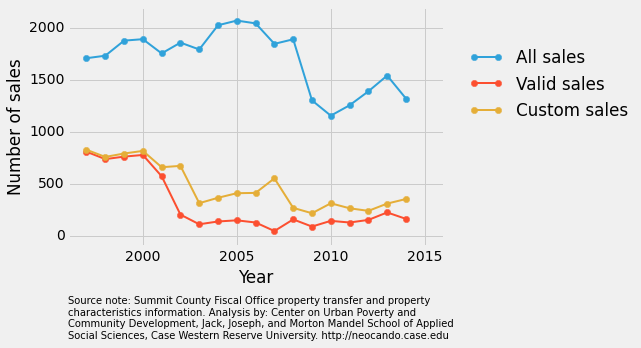

In [479]:
valid = df[(df.sale_valid=='1') & (df.sale_price>0) & (df.year > 1996) & (df.year < 2015) & (df.CLASS=='C')].groupby('year').size()
custom = df[(df.sale_valid.isin(custom_valid)) & (df.sale_price>0) & (df.year > 1996) & (df.year < 2015) & (df.CLASS=='C')].groupby('year').size()
all_sales = df[(df.year > 1996) & (df.year < 2015) & (df.CLASS=='C')].groupby('year').size()
data = valid.values*1.0/all_sales*100

chart1 = pd.DataFrame(index=all_sales.index)
chart1['all_sales'] = all_sales.values
chart1['valid_sales'] = valid.values
chart1['custom_valid_sales'] = custom.values

# chart1.to_csv('charts/chart.csv')

plt.plot(all_sales.index, all_sales.values,  '.-', markersize=12,linewidth=2)
plt.plot(valid.index, valid.values,  '.-', markersize=12,linewidth=2)
plt.plot(custom.index, custom.values,  '.-', markersize=12,linewidth=2)

# plt.title('Number of residential sales by year', y=1.08)
plt.legend(['All sales','Valid sales','Custom sales'],loc=(1.05,0.5))
plt.xlabel('Year')
plt.ylabel('Number of sales')
plt.xlim([1996,2016])
plt.ylim([-100,2200])

plt.annotate("Source note: Summit County Fiscal Office property transfer and property \n\
characteristics information. Analysis by: Center on Urban Poverty and \n\
Community Development, Jack, Joseph, and Morton Mandel School of Applied \n\
Social Sciences, Case Western Reserve University. http://neocando.case.edu", \
 (0,0), (0, -50), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

# plt.savefig('charts/commercial_sales.png',bbox_inches='tight')

In [480]:
print 'unique akron commercial parcels:', len(set(df[(df.year > 1996) & (df.year < 2015) & (df.CLASS=='C') & (df.akron==1)].parcel_id))
print 'unique cascade village commercial parcels:', len(set(df[(df.year > 1996) & (df.year < 2015) & (df.CLASS=='C') & (df.cascade_village==1)].parcel_id))
print 'unique edgewood commercial parcels:', len(set(df[(df.year > 1996) & (df.year < 2015) & (df.CLASS=='C') & (df.edgewood==1)].parcel_id))

print 'total akron parcels:', len(set(df[(df.year > 1996) & (df.year < 2015) & (df.akron==1)].parcel_id))
print 'total cascade village parcels:', len(set(df[(df.year > 1996) & (df.year < 2015) & (df.cascade_village==1)].parcel_id))
print 'total edgewood parcels:', len(set(df[(df.year > 1996) & (df.year < 2015) & (df.edgewood==1)].parcel_id))

print 'unique akron commercial parcels (%):', len(set(df[(df.year > 1996) & (df.year < 2015) & (df.CLASS=='C') & (df.akron==1)].parcel_id))*1.0/len(set(df[(df.year > 1996) & (df.year < 2015) & (df.akron==1)].parcel_id))
print 'unique cascade village commercial parcels (%):', len(set(df[(df.year > 1996) & (df.year < 2015) & (df.CLASS=='C') & (df.cascade_village==1)].parcel_id))*1.0/len(set(df[(df.year > 1996) & (df.year < 2015)& (df.cascade_village==1)].parcel_id))
print 'unique edgewood commercial parcels (%):', len(set(df[(df.year > 1996) & (df.year < 2015) & (df.CLASS=='C') & (df.edgewood==1)].parcel_id))*1.0/len(set(df[(df.year > 1996) & (df.year < 2015) & (df.edgewood==1)].parcel_id))

unique akron commercial parcels: 5275
unique cascade village commercial parcels: 337
unique edgewood commercial parcels: 109
total akron parcels: 63359
total cascade village parcels: 2204
total edgewood parcels: 1694
unique akron commercial parcels (%): 0.0832557332029
unique cascade village commercial parcels (%): 0.152903811252
unique edgewood commercial parcels (%): 0.0643447461629


In [481]:
df = df[df.CLASS=='C']
valid = df[(df.year > 1996) & (df.year < 2015) & (df.sale_valid=='1')]
custom = df[(df.year > 1996) & (df.year < 2015) & (df.sale_valid.isin(['1','8','B','C','F','G','L','N','P','S','U','V','X','Z']))]

def q2(x):
    return x.quantile(.25)
def q3(x):
    return x.quantile(.5)
def q4(x):
    return x.quantile(.75)

def get_by_year(df, zone, region):
    return df.loc[(df['CLASS']==zone) & (df[region]==1),['sale_price', 'year']].groupby('year').aggregate([np.median, len, np.average, min, q2, q3, q4, max])

##Chart 4-0: commercial turnover by year (valid sales only)

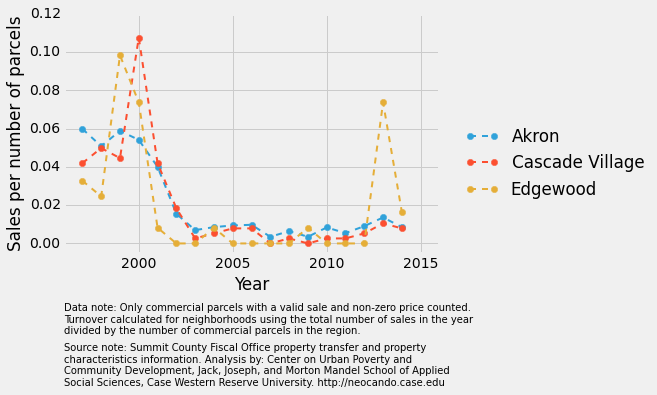

In [482]:
cv_by_year = get_by_year(valid, 'C', 'cascade_village')
ed_by_year = get_by_year(valid, 'C', 'edgewood')
ak_by_year = get_by_year(valid, 'C', 'akron')

chart4_0 = pd.DataFrame(index=all_sales.index[(all_sales.index>1996)&(all_sales.index<2015)])
chart4_0['ak_turnover'] = ak_by_year.sale_price['len']/len(set(df[(df.akron==1)].parcel_id))
chart4_0['cv_turnover'] = cv_by_year.sale_price['len']/len(set(df[(df.cascade_village==1)].parcel_id))
chart4_0['ed_turnover'] = ed_by_year.sale_price['len']/len(set(df[(df.edgewood==1)].parcel_id))
chart4_0 = chart4_0.fillna(0)

chart4_0.to_csv('charts/chart4-0.csv')

ax = plt.subplot(111)
plt.plot(chart4_0.index, chart4_0.ak_turnover, '.--', markersize=12,linewidth=2)
plt.plot(chart4_0.index, chart4_0.cv_turnover, '.--', markersize=12,linewidth=2)
plt.plot(chart4_0.index, chart4_0.ed_turnover, '.--', markersize=12,linewidth=2)

# plt.title('Residential turnover by year', y=1.08, x=.50)
plt.legend(['Akron','Cascade Village','Edgewood'], loc=(1.05,0.2))
plt.xlabel('Year')
plt.ylabel('Sales per number of parcels')
plt.xlim([1996,2016])
plt.ylim([-0.005,0.12])

plt.annotate("Data note: Only commercial parcels with a valid sale and non-zero price counted.\n\
Turnover calculated for neighborhoods using the total number of sales in the year \n\
divided by the number of commercial parcels in the region.", (0,0), (0, -50), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

plt.annotate("Source note: Summit County Fiscal Office property transfer and property \n\
characteristics information. Analysis by: Center on Urban Poverty and \n\
Community Development, Jack, Joseph, and Morton Mandel School of Applied \n\
Social Sciences, Case Western Reserve University. http://neocando.case.edu", (0,0), (0, -90), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

plt.savefig('charts/chart4-0.png',bbox_inches='tight')

##Chart 4-1: commercial turnover by year (custom sales)

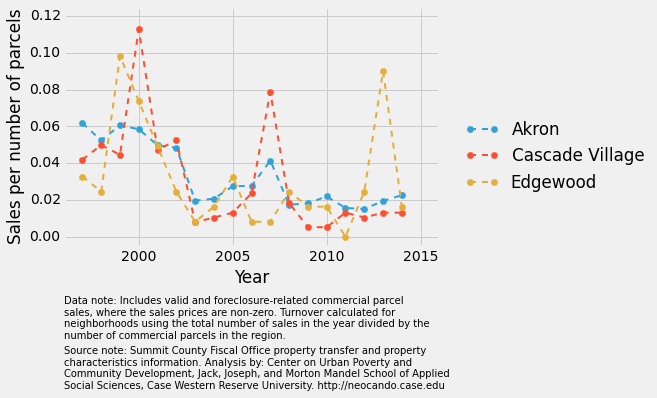

In [483]:
cv_by_year = get_by_year(custom, 'C', 'cascade_village')
ed_by_year = get_by_year(custom, 'C', 'edgewood')
ak_by_year = get_by_year(custom, 'C', 'akron')

chart4_1 = pd.DataFrame(index=all_sales.index[(all_sales.index>1996)&(all_sales.index<2015)])
chart4_1['ak_turnover'] = ak_by_year.sale_price['len']/len(set(df[(df.akron==1)].parcel_id))
chart4_1['cv_turnover'] = cv_by_year.sale_price['len']/len(set(df[(df.cascade_village==1)].parcel_id))
chart4_1['ed_turnover'] =  ed_by_year.sale_price['len']/len(set(df[(df.edgewood==1)].parcel_id))
chart4_1 = chart4_1.fillna(0)
chart4_1.to_csv('charts/chart4-1.csv')


ax = plt.subplot(111)
plt.plot(chart4_1.index, chart4_1.ak_turnover, '.--', markersize=12,linewidth=2)
plt.plot(chart4_1.index, chart4_1.cv_turnover, '.--', markersize=12,linewidth=2)
plt.plot(chart4_1.index, chart4_1.ed_turnover, '.--', markersize=12,linewidth=2)

plt.legend(['Akron','Cascade Village','Edgewood'], loc=(1.05,0.2))
plt.xlabel('Year')
plt.ylabel('Sales per number of parcels')
plt.xlim([1996,2016])
plt.ylim([-0.005,0.125])

plt.annotate("Data note: Includes valid and foreclosure-related commercial parcel \n\
sales, where the sales prices are non-zero. Turnover calculated for \n\
neighborhoods using the total number of sales in the year divided by the \n\
number of commercial parcels in the region.", (0,0), (0, -50), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

plt.annotate("Source note: Summit County Fiscal Office property transfer and property \n\
characteristics information. Analysis by: Center on Urban Poverty and \n\
Community Development, Jack, Joseph, and Morton Mandel School of Applied \n\
Social Sciences, Case Western Reserve University. http://neocando.case.edu", (0,0), (0, -100), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

plt.savefig('charts/chart4-1.png',bbox_inches='tight')

##Chart 4-2: commercial turnover by time period (valid sales)

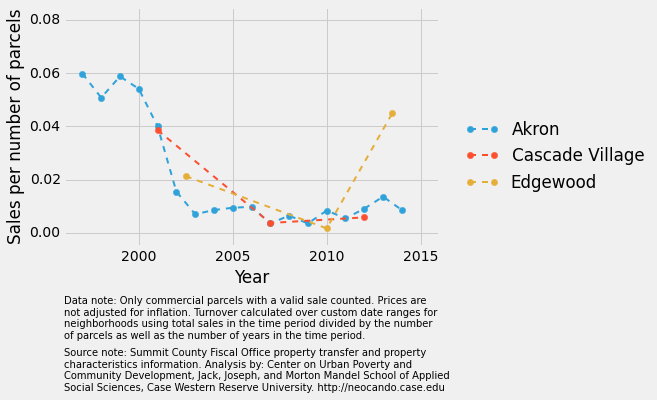

In [484]:
ak_by_year = get_by_year(valid, 'C', 'akron')

ed2 = pd.DataFrame(index=['Demo','Reoccupancy','Completion'], columns=['total','median','average','years','middle_year'])
cv2 = pd.DataFrame(index=['Demo','Reoccupancy','Completion'], columns=['total','median','average','years','middle_year'])

df_sub = valid[(valid['edgewood']==1)]

ed2['total'].ix['Demo'] = len(df_sub[(df_sub.year>=1998)&(df_sub.year<=2007)])
ed2['median'].ix['Demo'] = np.median(df_sub[(df_sub.year>=1998)&(df_sub.year<=2007)].sale_price)
ed2['years'].ix['Demo'] = 10
ed2['middle_year'].ix['Demo'] = 2002.5

ed2['total'].ix['Reoccupancy'] = len(df_sub[(df_sub.year>=2008)&(df_sub.year<=2012)])
ed2['median'].ix['Reoccupancy'] = np.median(df_sub[(df_sub.year>=2008)&(df_sub.year<=2012)].sale_price)
ed2['years'].ix['Reoccupancy'] = 5
ed2['middle_year'].ix['Reoccupancy'] = 2010

ed2['total'].ix['Completion'] = len(df_sub[(df_sub.year>=2013)&(df_sub.year<=2014)])
ed2['median'].ix['Completion'] = np.median(df_sub[(df_sub.year>=2013)&(df_sub.year<=2014)].sale_price)
ed2['years'].ix['Completion'] = 2
ed2['middle_year'].ix['Completion'] = 2013.5

df_sub = valid[(valid['cascade_village']==1)]

cv2['total'].ix['Demo'] = len(df_sub[(df_sub.year>=1998)&(df_sub.year<=2004)])
cv2['median'].ix['Demo'] = np.median(df_sub[(df_sub.year>=1998)&(df_sub.year<=2004)].sale_price)
cv2['years'].ix['Demo'] = 7
cv2['middle_year'].ix['Demo'] = 2001

cv2['total'].ix['Reoccupancy'] = len(df_sub[(df_sub.year>=2005)&(df_sub.year<=2009)])
cv2['median'].ix['Reoccupancy'] = np.median(df_sub[(df_sub.year>=2005)&(df_sub.year<=2009)].sale_price)
cv2['years'].ix['Reoccupancy'] = 5
cv2['middle_year'].ix['Reoccupancy'] = 2007

cv2['total'].ix['Completion'] = len(df_sub[(df_sub.year>=2010)&(df_sub.year<=2014)])
cv2['median'].ix['Completion'] = np.median(df_sub[(df_sub.year>=2010)&(df_sub.year<=2014)].sale_price)
cv2['years'].ix['Completion'] = 5
cv2['middle_year'].ix['Completion'] = 2012

chart4_2 = pd.DataFrame(index=ak_by_year.index)
chart4_2['ak_turnover_custom'] = ak_by_year.sale_price['len']/len(set(df[df.akron==1].parcel_id))
chart4_2.loc[chart4_2.index.isin(cv2.middle_year.values),'cv_turnover_custom'] = (cv2['total']*1.0/cv2['years']/len(set(df[df.cascade_village==1].parcel_id))).values
chart4_2.loc[chart4_2.index.isin([2003,2010,2014]),'ed_turnover_custom'] =  (ed2['total']*1.0/ed2['years']/len(set(df[df.edgewood==1].parcel_id))).values
chart4_2.to_csv('charts/chart4-2.csv')

ax = plt.subplot(111)
plt.plot(ak_by_year.index, ak_by_year.sale_price['len']/len(set(df[(df.akron==1) & (df.CLASS=='C')].parcel_id)),  '.--', markersize=12,linewidth=2)
plt.plot(cv2.middle_year, cv2['total']*1.0/cv2['years']/len(set(df[(df.cascade_village==1) & (df.CLASS=='C')].parcel_id)), '.--', markersize=12,linewidth=2)
plt.plot(ed2.middle_year, ed2['total']*1.0/ed2['years']/len(set(df[(df.edgewood==1) & (df.CLASS=='C')].parcel_id)), '.--', markersize=12,linewidth=2)

plt.legend(['Akron','Cascade Village','Edgewood'], loc=(1.05,0.2))
plt.xlabel('Year')
plt.ylabel('Sales per number of parcels')
plt.xlim([1996,2016])
plt.ylim([-0.005,0.085])

plt.annotate("Data note: Only commercial parcels with a valid sale counted. Prices are \n\
not adjusted for inflation. Turnover calculated over custom date ranges for\n\
neighborhoods using total sales in the time period divided by the number\n\
of parcels as well as the number of years in the time period.", (0,0), (0, -50), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

plt.annotate("Source note: Summit County Fiscal Office property transfer and property \n\
characteristics information. Analysis by: Center on Urban Poverty and \n\
Community Development, Jack, Joseph, and Morton Mandel School of Applied \n\
Social Sciences, Case Western Reserve University. http://neocando.case.edu", (0,0), (0, -102), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

plt.savefig('charts/chart4-2.png',bbox_inches='tight')

#Chart 4-3: commercial turnover by time period (custom sales)

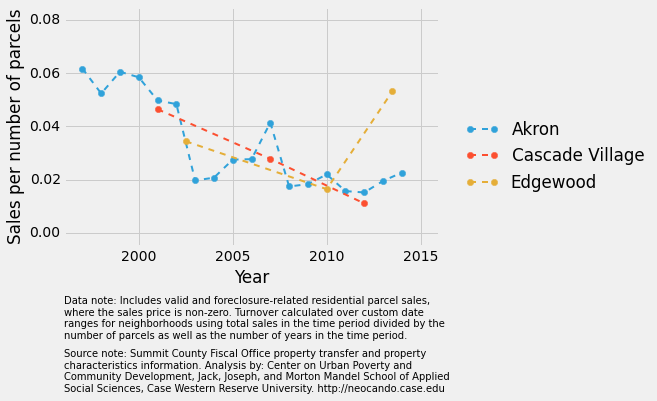

In [485]:
ak_by_year = get_by_year(custom, 'C', 'akron')

ed2 = pd.DataFrame(index=['Demo','Reoccupancy','Completion'], columns=['total','median','average','years','middle_year'])
cv2 = pd.DataFrame(index=['Demo','Reoccupancy','Completion'], columns=['total','median','average','years','middle_year'])

df_sub = custom[(custom['edgewood']==1)]

ed2['total'].ix['Demo'] = len(df_sub[(df_sub.year>=1998)&(df_sub.year<=2007)])
ed2['median'].ix['Demo'] = np.median(df_sub[(df_sub.year>=1998)&(df_sub.year<=2007)].sale_price)
ed2['years'].ix['Demo'] = 10
ed2['middle_year'].ix['Demo'] = 2002.5

ed2['total'].ix['Reoccupancy'] = len(df_sub[(df_sub.year>=2008)&(df_sub.year<=2012)])
ed2['median'].ix['Reoccupancy'] = np.median(df_sub[(df_sub.year>=2008)&(df_sub.year<=2012)].sale_price)
ed2['years'].ix['Reoccupancy'] = 5
ed2['middle_year'].ix['Reoccupancy'] = 2010

ed2['total'].ix['Completion'] = len(df_sub[(df_sub.year>=2013)&(df_sub.year<=2014)])
ed2['median'].ix['Completion'] = np.median(df_sub[(df_sub.year>=2013)&(df_sub.year<=2014)].sale_price)
ed2['years'].ix['Completion'] = 2
ed2['middle_year'].ix['Completion'] = 2013.5

df_sub = custom[(custom['cascade_village']==1)]

cv2['total'].ix['Demo'] = len(df_sub[(df_sub.year>=1998)&(df_sub.year<=2004)])
cv2['median'].ix['Demo'] = np.median(df_sub[(df_sub.year>=1998)&(df_sub.year<=2004)].sale_price)
cv2['years'].ix['Demo'] = 7
cv2['middle_year'].ix['Demo'] = 2001

cv2['total'].ix['Reoccupancy'] = len(df_sub[(df_sub.year>=2005)&(df_sub.year<=2009)])
cv2['median'].ix['Reoccupancy'] = np.median(df_sub[(df_sub.year>=2005)&(df_sub.year<=2009)].sale_price)
cv2['years'].ix['Reoccupancy'] = 5
cv2['middle_year'].ix['Reoccupancy'] = 2007

cv2['total'].ix['Completion'] = len(df_sub[(df_sub.year>=2010)&(df_sub.year<=2014)])
cv2['median'].ix['Completion'] = np.median(df_sub[(df_sub.year>=2010)&(df_sub.year<=2014)].sale_price)
cv2['years'].ix['Completion'] = 5
cv2['middle_year'].ix['Completion'] = 2012

chart4_3 = pd.DataFrame(index=ak_by_year.index)
chart4_3['ak_turnover_custom'] = ak_by_year.sale_price['len']/len(set(df[df.akron==1].parcel_id))
chart4_3.loc[chart4_3.index.isin(cv2.middle_year.values),'cv_turnover_custom'] = (cv2['total']*1.0/cv2['years']/len(set(df[df.cascade_village==1].parcel_id))).values
chart4_3.loc[chart4_3.index.isin([2003,2010,2014]),'ed_turnover_custom'] =  (ed2['total']*1.0/ed2['years']/len(set(df[df.edgewood==1].parcel_id))).values
chart4_3.to_csv('charts/chart4-3.csv')

ax = plt.subplot(111)
plt.plot(ak_by_year.index, ak_by_year.sale_price['len']/len(set(df[(df.akron==1) & (df.CLASS=='C')].parcel_id)),  '.--', markersize=12,linewidth=2)
plt.plot(cv2.middle_year, cv2['total']*1.0/cv2['years']/len(set(df[(df.cascade_village==1) & (df.CLASS=='C')].parcel_id)), '.--', markersize=12,linewidth=2)
plt.plot(ed2.middle_year, ed2['total']*1.0/ed2['years']/len(set(df[(df.edgewood==1) & (df.CLASS=='C')].parcel_id)), '.--', markersize=12,linewidth=2)

plt.legend(['Akron','Cascade Village','Edgewood'], loc=(1.05,0.2))
plt.xlabel('Year')
plt.ylabel('Sales per number of parcels')
plt.xlim([1996,2016])
plt.ylim([-0.005,0.085])
    
plt.annotate("Data note: Includes valid and foreclosure-related residential parcel sales, \n\
where the sales price is non-zero. Turnover calculated over custom date \n\
ranges for neighborhoods using total sales in the time period divided by the \n\
number of parcels as well as the number of years in the time period.", (0,0), (0, -50), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

plt.annotate("Source note: Summit County Fiscal Office property transfer and property \n\
characteristics information. Analysis by: Center on Urban Poverty and \n\
Community Development, Jack, Joseph, and Morton Mandel School of Applied \n\
Social Sciences, Case Western Reserve University. http://neocando.case.edu", (0,0), (0, -103), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

plt.savefig('charts/chart4-3.png',bbox_inches='tight')

##Chart 4-4: commercial turnover by year (all sales)

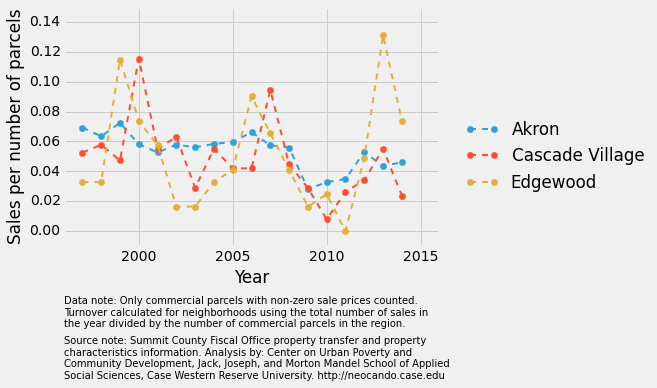

In [486]:
cv_by_year = get_by_year(df[(df.year>1996) & (df.year<2015) & (df.sale_price>0)], 'C', 'cascade_village')
ed_by_year = get_by_year(df[(df.year>1996) & (df.year<2015) & (df.sale_price>0)], 'C', 'edgewood')
ak_by_year = get_by_year(df[(df.year>1996) & (df.year<2015) & (df.sale_price>0)], 'C', 'akron')

chart4_4 = pd.DataFrame(index=all_sales.index[(all_sales.index>1996)&(all_sales.index<2015)])
chart4_4['ak_turnover'] = ak_by_year.sale_price['len']/len(set(df[(df.akron==1)].parcel_id))
chart4_4['cv_turnover'] = cv_by_year.sale_price['len']/len(set(df[(df.cascade_village==1)].parcel_id))
chart4_4['ed_turnover'] =  ed_by_year.sale_price['len']/len(set(df[(df.edgewood==1)].parcel_id))
chart4_4 = chart4_4.fillna(0)
chart4_4.to_csv('charts/chart4-4.csv')


ax = plt.subplot(111)
plt.plot(chart4_4.index, chart4_4.ak_turnover, '.--', markersize=12,linewidth=2)
plt.plot(chart4_4.index, chart4_4.cv_turnover, '.--', markersize=12,linewidth=2)
plt.plot(chart4_4.index, chart4_4.ed_turnover, '.--', markersize=12,linewidth=2)

# plt.title('Residential turnover by year', y=1.08, x=.50)
plt.legend(['Akron','Cascade Village','Edgewood'], loc=(1.05,0.2))
plt.xlabel('Year')
plt.ylabel('Sales per number of parcels')
plt.xlim([1996,2016])
plt.ylim([-0.01,0.15])


plt.annotate("Data note: Only commercial parcels with non-zero sale prices counted.\n\
Turnover calculated for neighborhoods using the total number of sales in\n\
the year divided by the number of commercial parcels in the region.",\
             (0,0), (0, -50), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

plt.annotate("Source note: Summit County Fiscal Office property transfer and property \n\
characteristics information. Analysis by: Center on Urban Poverty and \n\
Community Development, Jack, Joseph, and Morton Mandel School of Applied \n\
Social Sciences, Case Western Reserve University. http://neocando.case.edu", (0,0), (0, -90), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

plt.savefig('charts/chart4-4.png',bbox_inches='tight')

##Chart 4-5: commercial turnover by time period (all sales)

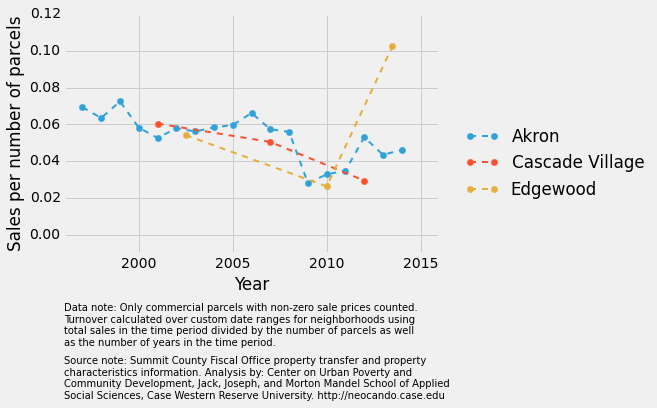

In [487]:
ak_by_year = get_by_year(df[(df.year>1996) & (df.year<2015) & (df.sale_price>0)], 'C', 'akron')

ed2 = pd.DataFrame(index=['Demo','Reoccupancy','Completion'], columns=['total','median','average','years','middle_year'])
cv2 = pd.DataFrame(index=['Demo','Reoccupancy','Completion'], columns=['total','median','average','years','middle_year'])

df_sub = df[(df['edgewood']==1) & (df.sale_price>0)]

ed2['total'].ix['Demo'] = len(df_sub[(df_sub.year>=1998)&(df_sub.year<=2007)])
ed2['median'].ix['Demo'] = np.median(df_sub[(df_sub.year>=1998)&(df_sub.year<=2007)].sale_price)
ed2['years'].ix['Demo'] = 10
ed2['middle_year'].ix['Demo'] = 2002.5

ed2['total'].ix['Reoccupancy'] = len(df_sub[(df_sub.year>=2008)&(df_sub.year<=2012)])
ed2['median'].ix['Reoccupancy'] = np.median(df_sub[(df_sub.year>=2008)&(df_sub.year<=2012)].sale_price)
ed2['years'].ix['Reoccupancy'] = 5
ed2['middle_year'].ix['Reoccupancy'] = 2010

ed2['total'].ix['Completion'] = len(df_sub[(df_sub.year>=2013)&(df_sub.year<=2014)])
ed2['median'].ix['Completion'] = np.median(df_sub[(df_sub.year>=2013)&(df_sub.year<=2014)].sale_price)
ed2['years'].ix['Completion'] = 2
ed2['middle_year'].ix['Completion'] = 2013.5

df_sub = df[(df['cascade_village']==1) & (df.sale_price>0)]

cv2['total'].ix['Demo'] = len(df_sub[(df_sub.year>=1998)&(df_sub.year<=2004)])
cv2['median'].ix['Demo'] = np.median(df_sub[(df_sub.year>=1998)&(df_sub.year<=2004)].sale_price)
cv2['years'].ix['Demo'] = 7
cv2['middle_year'].ix['Demo'] = 2001

cv2['total'].ix['Reoccupancy'] = len(df_sub[(df_sub.year>=2005)&(df_sub.year<=2009)])
cv2['median'].ix['Reoccupancy'] = np.median(df_sub[(df_sub.year>=2005)&(df_sub.year<=2009)].sale_price)
cv2['years'].ix['Reoccupancy'] = 5
cv2['middle_year'].ix['Reoccupancy'] = 2007

cv2['total'].ix['Completion'] = len(df_sub[(df_sub.year>=2010)&(df_sub.year<=2014)])
cv2['median'].ix['Completion'] = np.median(df_sub[(df_sub.year>=2010)&(df_sub.year<=2014)].sale_price)
cv2['years'].ix['Completion'] = 5
cv2['middle_year'].ix['Completion'] = 2012

chart4_5 = pd.DataFrame(index=ak_by_year.index)
chart4_5['ak_turnover_custom'] = ak_by_year.sale_price['len']/len(set(df[df.akron==1].parcel_id))
chart4_5.loc[chart4_5.index.isin(cv2.middle_year.values),'cv_turnover_custom'] = (cv2['total']*1.0/cv2['years']/len(set(df[df.cascade_village==1].parcel_id))).values
chart4_5.loc[chart4_5.index.isin([2003,2010,2014]),'ed_turnover_custom'] =  (ed2['total']*1.0/ed2['years']/len(set(df[df.edgewood==1].parcel_id))).values
chart4_5.to_csv('charts/chart4-5.csv')

ax = plt.subplot(111)
plt.plot(ak_by_year.index, ak_by_year.sale_price['len']/len(set(df[(df.akron==1) & (df.CLASS=='C')].parcel_id)),  '.--', markersize=12,linewidth=2)
plt.plot(cv2.middle_year, cv2['total']*1.0/cv2['years']/len(set(df[(df.cascade_village==1) & (df.CLASS=='C')].parcel_id)), '.--', markersize=12,linewidth=2)
plt.plot(ed2.middle_year, ed2['total']*1.0/ed2['years']/len(set(df[(df.edgewood==1) & (df.CLASS=='C')].parcel_id)), '.--', markersize=12,linewidth=2)

plt.legend(['Akron','Cascade Village','Edgewood'], loc=(1.05,0.2))
plt.xlabel('Year')
plt.ylabel('Sales per number of parcels')
plt.xlim([1996,2016])
plt.ylim([-0.01,0.120])

plt.annotate("Data note: Only commercial parcels with non-zero sale prices counted.\n\
Turnover calculated over custom date ranges for neighborhoods using \n\
total sales in the time period divided by the number of parcels as well \n\
as the number of years in the time period.", (0,0), (0, -50), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

plt.annotate("Source note: Summit County Fiscal Office property transfer and property \n\
characteristics information. Analysis by: Center on Urban Poverty and \n\
Community Development, Jack, Joseph, and Morton Mandel School of Applied \n\
Social Sciences, Case Western Reserve University. http://neocando.case.edu", (0,0), (0, -103), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

plt.savefig('charts/chart4-5.png',bbox_inches='tight')

## Chart 5-0: median commercial sales price by year (valid sales only)

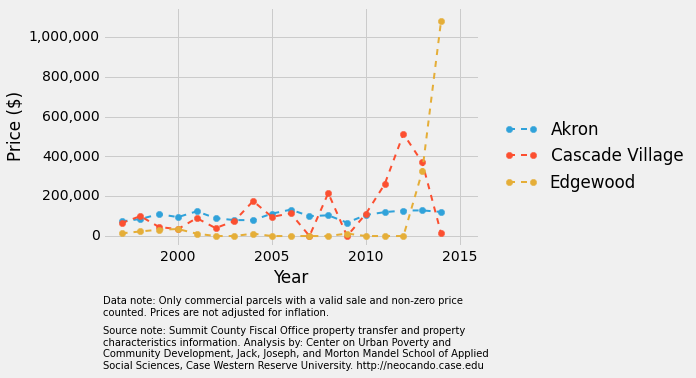

In [498]:
ak_by_year = get_by_year(valid, 'C', 'akron')
cv_by_year = get_by_year(valid, 'C', 'cascade_village')
ed_by_year = get_by_year(valid, 'C', 'edgewood')

ak_by_year = ak_by_year.rename(columns={'sale_price':'ak_sale_price'})
cv_by_year = cv_by_year.rename(columns={'sale_price':'cv_sale_price'})
ed_by_year = ed_by_year.rename(columns={'sale_price':'ed_sale_price'})

pd.concat([ak_by_year, cv_by_year, ed_by_year], axis=1).to_csv('charts/chart5-0.csv')

chart5_0 = pd.DataFrame(index=all_sales.index[(all_sales.index>1996)&(all_sales.index<2015)])
chart5_0['ak_median_sale_price'] = ak_by_year.ak_sale_price['median']
chart5_0['cv_median_sale_price'] = cv_by_year.cv_sale_price['median']
chart5_0['ed_median_sale_price'] = ed_by_year.ed_sale_price['median']
chart5_0 = chart5_0.fillna(0)
# chart5_0.to_csv('charts/chart5-0.csv')

ax = plt.subplot(111)
plt.plot(chart5_0.index, chart5_0.ak_median_sale_price, '.--', markersize=12,linewidth=2)
plt.plot(chart5_0.index, chart5_0.cv_median_sale_price, '.--', markersize=12,linewidth=2)
plt.plot(chart5_0.index, chart5_0.ed_median_sale_price, '.--', markersize=12,linewidth=2)

plt.legend(['Akron','Cascade Village','Edgewood'], loc=(1.05,0.2))
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.xlim([1996,2016])
plt.ylim(-50000,1150000)

plt.annotate("Data note: Only commercial parcels with a valid sale and non-zero price\n\
counted. Prices are not adjusted for inflation.", (0,0), (0, -50), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

plt.annotate("Source note: Summit County Fiscal Office property transfer and property \n\
characteristics information. Analysis by: Center on Urban Poverty and \n\
Community Development, Jack, Joseph, and Morton Mandel School of Applied \n\
Social Sciences, Case Western Reserve University. http://neocando.case.edu", (0,0), (0, -80), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

ax.get_yaxis().set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.savefig('charts/chart5-0.png',bbox_inches='tight')

##Chart 5-1: median commercial sales price by year (custom valid sales)

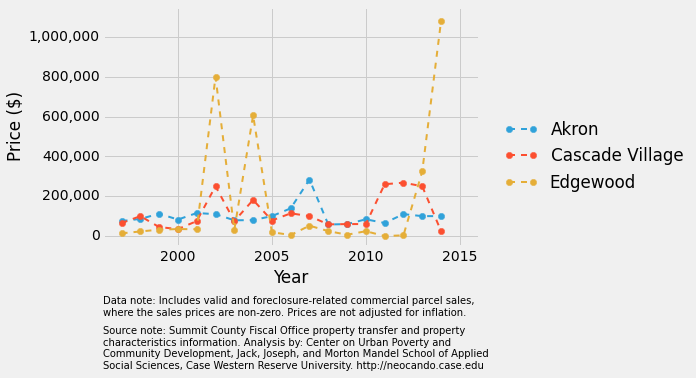

In [500]:
ak_by_year = get_by_year(custom, 'C', 'akron')
cv_by_year = get_by_year(custom, 'C', 'cascade_village')
ed_by_year = get_by_year(custom, 'C', 'edgewood')

ak_by_year = ak_by_year.rename(columns={'sale_price':'ak_sale_price'})
cv_by_year = cv_by_year.rename(columns={'sale_price':'cv_sale_price'})
ed_by_year = ed_by_year.rename(columns={'sale_price':'ed_sale_price'})

pd.concat([ak_by_year, cv_by_year, ed_by_year], axis=1).to_csv('charts/chart5-1.csv')

chart5_1 = pd.DataFrame(index=all_sales.index[(all_sales.index>1996)&(all_sales.index<2015)])
chart5_1['ak_median_sale_price'] = ak_by_year.ak_sale_price['median']
chart5_1['cv_median_sale_price'] = cv_by_year.cv_sale_price['median']
chart5_1['ed_median_sale_price'] = ed_by_year.ed_sale_price['median']
chart5_1 = chart5_1.fillna(0)
# chart5_1.to_csv('charts/chart5-1.csv')

ax = plt.subplot(111)
plt.plot(chart5_1.index, chart5_1.ak_median_sale_price, '.--', markersize=12,linewidth=2)
plt.plot(chart5_1.index, chart5_1.cv_median_sale_price, '.--', markersize=12,linewidth=2)
plt.plot(chart5_1.index, chart5_1.ed_median_sale_price, '.--', markersize=12,linewidth=2)

plt.legend(['Akron','Cascade Village','Edgewood'], loc=(1.05,0.2))
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.xlim([1996,2016])
plt.ylim(-50000,1150000)

plt.annotate("Data note: Includes valid and foreclosure-related commercial parcel sales, \n\
where the sales prices are non-zero. Prices are not adjusted for inflation.", (0,0), (0, -50), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

plt.annotate("Source note: Summit County Fiscal Office property transfer and property \n\
characteristics information. Analysis by: Center on Urban Poverty and \n\
Community Development, Jack, Joseph, and Morton Mandel School of Applied \n\
Social Sciences, Case Western Reserve University. http://neocando.case.edu", (0,0), (0, -80), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

ax.get_yaxis().set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.savefig('charts/chart5-1.png',bbox_inches='tight')

##Chart 5-2: median commercial sales price by custom time periods (valid sales only)

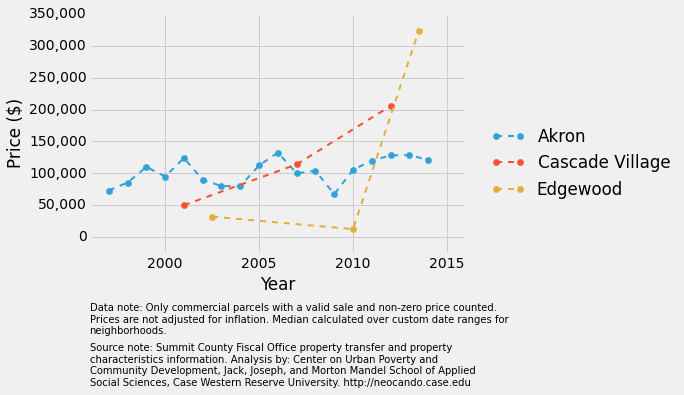

In [490]:
ak_by_year = get_by_year(valid, 'C', 'akron')

ed2 = pd.DataFrame(index=['Demo','Reoccupancy','Completion'], columns=['total','median','average','years','middle_year'])
cv2 = pd.DataFrame(index=['Demo','Reoccupancy','Completion'], columns=['total','median','average','years','middle_year'])

df_sub = valid[(valid['edgewood']==1)]

ed2['total'].ix['Demo'] = len(df_sub[(df_sub.year>=1998)&(df_sub.year<=2007)])
ed2['median'].ix['Demo'] = np.median(df_sub[(df_sub.year>=1998)&(df_sub.year<=2007)].sale_price)
ed2['years'].ix['Demo'] = 10
ed2['middle_year'].ix['Demo'] = 2002.5

ed2['total'].ix['Reoccupancy'] = len(df_sub[(df_sub.year>=2008)&(df_sub.year<=2012)])
ed2['median'].ix['Reoccupancy'] = np.median(df_sub[(df_sub.year>=2008)&(df_sub.year<=2012)].sale_price)
ed2['years'].ix['Reoccupancy'] = 5
ed2['middle_year'].ix['Reoccupancy'] = 2010

ed2['total'].ix['Completion'] = len(df_sub[(df_sub.year>=2013)&(df_sub.year<=2014)])
ed2['median'].ix['Completion'] = np.median(df_sub[(df_sub.year>=2013)&(df_sub.year<=2014)].sale_price)
ed2['years'].ix['Completion'] = 2
ed2['middle_year'].ix['Completion'] = 2013.5

df_sub = valid[(valid['cascade_village']==1)]

cv2['total'].ix['Demo'] = len(df_sub[(df_sub.year>=1998)&(df_sub.year<=2004)])
cv2['median'].ix['Demo'] = np.median(df_sub[(df_sub.year>=1998)&(df_sub.year<=2004)].sale_price)
cv2['years'].ix['Demo'] = 7
cv2['middle_year'].ix['Demo'] = 2001

cv2['total'].ix['Reoccupancy'] = len(df_sub[(df_sub.year>=2005)&(df_sub.year<=2009)])
cv2['median'].ix['Reoccupancy'] = np.median(df_sub[(df_sub.year>=2005)&(df_sub.year<=2009)].sale_price)
cv2['years'].ix['Reoccupancy'] = 5
cv2['middle_year'].ix['Reoccupancy'] = 2007

cv2['total'].ix['Completion'] = len(df_sub[(df_sub.year>=2010)&(df_sub.year<=2014)])
cv2['median'].ix['Completion'] = np.median(df_sub[(df_sub.year>=2010)&(df_sub.year<=2014)].sale_price)
cv2['years'].ix['Completion'] = 5
cv2['middle_year'].ix['Completion'] = 2012

chart5_2 = pd.DataFrame(index=ak_by_year.index)
chart5_2['ak_median_custom'] = ak_by_year.sale_price['median']
chart5_2.loc[chart5_2.index.isin(cv2.middle_year.values),'cv_median_custom'] = (cv2['median']).values
chart5_2.loc[chart5_2.index.isin([2003,2010,2014]),'ed_median_custom'] =  (ed2['median']).values
chart5_2.to_csv('charts/chart5-2.csv')

ax = plt.subplot(111)
plt.plot(ak_by_year.index, ak_by_year.sale_price['median'],  '.--', markersize=12,linewidth=2)
plt.plot(cv2.middle_year, cv2['median'], '.--', markersize=12,linewidth=2)
plt.plot(ed2.middle_year, ed2['median'], '.--', markersize=12,linewidth=2)

plt.legend(['Akron','Cascade Village','Edgewood'], loc=(1.05,0.2))
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.xlim([1996,2016])
plt.ylim(-25000,350000)
ax.get_yaxis().set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.annotate("Data note: Only commercial parcels with a valid sale and non-zero price counted.\n\
Prices are not adjusted for inflation. Median calculated over custom date ranges for\n\
neighborhoods.", (0,0), (0, -50), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

plt.annotate("Source note: Summit County Fiscal Office property transfer and property \n\
characteristics information. Analysis by: Center on Urban Poverty and \n\
Community Development, Jack, Joseph, and Morton Mandel School of Applied \n\
Social Sciences, Case Western Reserve University. http://neocando.case.edu", (0,0), (0, -90), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

plt.savefig('charts/chart5-2.png',bbox_inches='tight')

##Chart 5-3: median commercial sales price by custom time periods (custom valid sales)

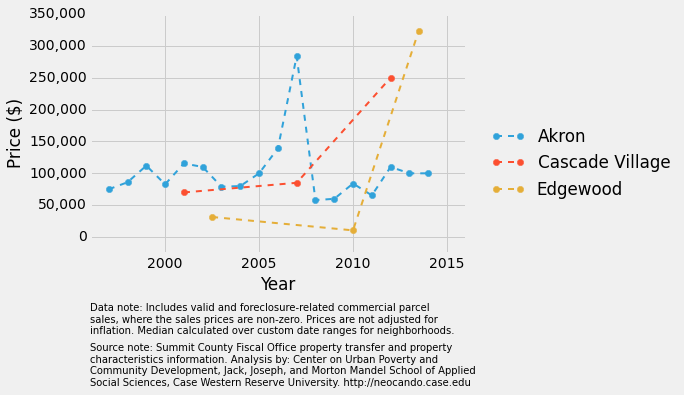

In [501]:
ak_by_year = get_by_year(custom, 'C', 'akron')

ed2 = pd.DataFrame(index=['Demo','Reoccupancy','Completion'], columns=['total','median','average','years','middle_year'])
cv2 = pd.DataFrame(index=['Demo','Reoccupancy','Completion'], columns=['total','median','average','years','middle_year'])

df_sub = custom[(custom['edgewood']==1)]

ed2['total'].ix['Demo'] = len(df_sub[(df_sub.year>=1998)&(df_sub.year<=2007)])
ed2['median'].ix['Demo'] = np.median(df_sub[(df_sub.year>=1998)&(df_sub.year<=2007)].sale_price)
ed2['years'].ix['Demo'] = 10
ed2['middle_year'].ix['Demo'] = 2002.5

ed2['total'].ix['Reoccupancy'] = len(df_sub[(df_sub.year>=2008)&(df_sub.year<=2012)])
ed2['median'].ix['Reoccupancy'] = np.median(df_sub[(df_sub.year>=2008)&(df_sub.year<=2012)].sale_price)
ed2['years'].ix['Reoccupancy'] = 5
ed2['middle_year'].ix['Reoccupancy'] = 2010

ed2['total'].ix['Completion'] = len(df_sub[(df_sub.year>=2013)&(df_sub.year<=2014)])
ed2['median'].ix['Completion'] = np.median(df_sub[(df_sub.year>=2013)&(df_sub.year<=2014)].sale_price)
ed2['years'].ix['Completion'] = 2
ed2['middle_year'].ix['Completion'] = 2013.5

df_sub = custom[(custom['cascade_village']==1)]

cv2['total'].ix['Demo'] = len(df_sub[(df_sub.year>=1998)&(df_sub.year<=2004)])
cv2['median'].ix['Demo'] = np.median(df_sub[(df_sub.year>=1998)&(df_sub.year<=2004)].sale_price)
cv2['years'].ix['Demo'] = 7
cv2['middle_year'].ix['Demo'] = 2001

cv2['total'].ix['Reoccupancy'] = len(df_sub[(df_sub.year>=2005)&(df_sub.year<=2009)])
cv2['median'].ix['Reoccupancy'] = np.median(df_sub[(df_sub.year>=2005)&(df_sub.year<=2009)].sale_price)
cv2['years'].ix['Reoccupancy'] = 5
cv2['middle_year'].ix['Reoccupancy'] = 2007

cv2['total'].ix['Completion'] = len(df_sub[(df_sub.year>=2010)&(df_sub.year<=2014)])
cv2['median'].ix['Completion'] = np.median(df_sub[(df_sub.year>=2010)&(df_sub.year<=2014)].sale_price)
cv2['years'].ix['Completion'] = 5
cv2['middle_year'].ix['Completion'] = 2012

chart5_3 = pd.DataFrame(index=ak_by_year.index)
chart5_3['ak_median_custom'] = ak_by_year.sale_price['median']
chart5_3.loc[chart5_3.index.isin(cv2.middle_year.values),'cv_median_custom'] = (cv2['median']).values
chart5_3.loc[chart5_3.index.isin([2003,2010,2014]),'ed_median_custom'] =  (ed2['median']).values
chart5_3.to_csv('charts/chart5-3.csv')

ax = plt.subplot(111)
plt.plot(ak_by_year.index, ak_by_year.sale_price['median'],  '.--', markersize=12,linewidth=2)
plt.plot(cv2.middle_year, cv2['median'], '.--', markersize=12,linewidth=2)
plt.plot(ed2.middle_year, ed2['median'], '.--', markersize=12,linewidth=2)

plt.legend(['Akron','Cascade Village','Edgewood'], loc=(1.05,0.2))
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.xlim([1996,2016])
plt.ylim(-25000,350000)
ax.get_yaxis().set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.annotate("Data note: Includes valid and foreclosure-related commercial parcel \n\
sales, where the sales prices are non-zero. Prices are not adjusted for\n\
inflation. Median calculated over custom date ranges for neighborhoods.", (0,0), (0, -50), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

plt.annotate("Source note: Summit County Fiscal Office property transfer and property \n\
characteristics information. Analysis by: Center on Urban Poverty and \n\
Community Development, Jack, Joseph, and Morton Mandel School of Applied \n\
Social Sciences, Case Western Reserve University. http://neocando.case.edu", (0,0), (0, -90), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

plt.savefig('charts/chart5-3.png',bbox_inches='tight')

##Chart 5-4: median commercial by year (all sales)

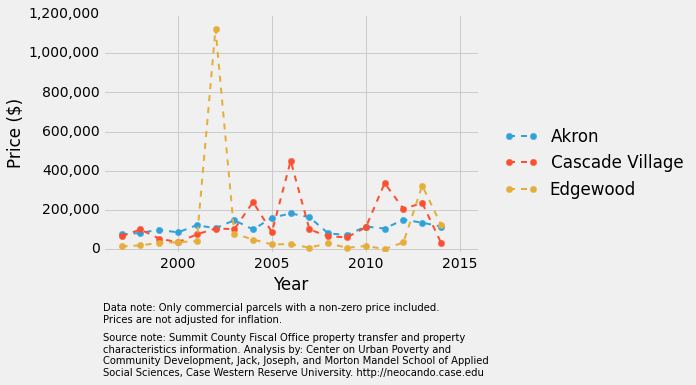

In [497]:
ak_by_year = get_by_year(df[(df.year>1996) & (df.year<2015) & (df.sale_price>0)], 'C', 'akron')
cv_by_year = get_by_year(df[(df.year>1996) & (df.year<2015) & (df.sale_price>0)], 'C', 'cascade_village')
ed_by_year = get_by_year(df[(df.year>1996) & (df.year<2015) & (df.sale_price>0)], 'C', 'edgewood')

ak_by_year = ak_by_year.rename(columns={'sale_price':'ak_sale_price'})
cv_by_year = cv_by_year.rename(columns={'sale_price':'cv_sale_price'})
ed_by_year = ed_by_year.rename(columns={'sale_price':'ed_sale_price'})

pd.concat([ak_by_year, cv_by_year, ed_by_year], axis=1).to_csv('charts/chart5-4.csv')

chart5_4 = pd.DataFrame(index=all_sales.index[(all_sales.index>1996)&(all_sales.index<2015)])
chart5_4['ak_median_sale_price'] = ak_by_year.ak_sale_price['median']
chart5_4['cv_median_sale_price'] = cv_by_year.cv_sale_price['median']
chart5_4['ed_median_sale_price'] = ed_by_year.ed_sale_price['median']
chart5_4 = chart5_4.fillna(0)
# chart5_4.to_csv('charts/chart5-4.csv')

ax = plt.subplot(111)
plt.plot(chart5_4.index, chart5_4.ak_median_sale_price, '.--', markersize=12,linewidth=2)
plt.plot(chart5_4.index, chart5_4.cv_median_sale_price, '.--', markersize=12,linewidth=2)
plt.plot(chart5_4.index, chart5_4.ed_median_sale_price, '.--', markersize=12,linewidth=2)

plt.legend(['Akron','Cascade Village','Edgewood'], loc=(1.05,0.2))
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.xlim([1996,2016])
plt.ylim(-20000,1200000)

plt.annotate("Data note: Only commercial parcels with a non-zero price included. \n\
Prices are not adjusted for inflation.", (0,0), (0, -50), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

plt.annotate("Source note: Summit County Fiscal Office property transfer and property \n\
characteristics information. Analysis by: Center on Urban Poverty and \n\
Community Development, Jack, Joseph, and Morton Mandel School of Applied \n\
Social Sciences, Case Western Reserve University. http://neocando.case.edu", (0,0), (0, -80), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

ax.get_yaxis().set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.savefig('charts/chart5-4.png',bbox_inches='tight')

##Chart 5-5: median commercial by custom time period (all sales)

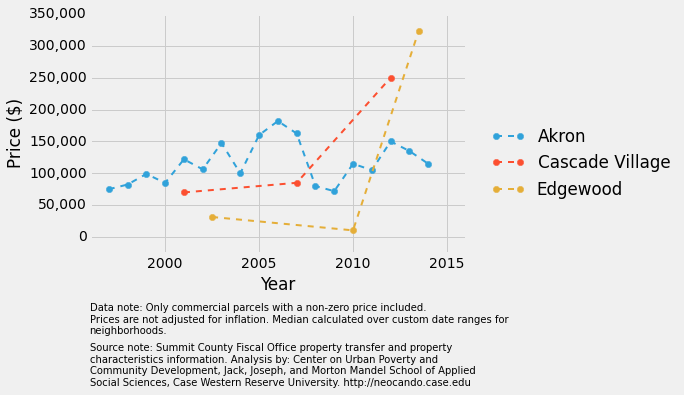

In [493]:
ak_by_year = get_by_year(df[(df.year>1996) & (df.year<2015) & (df.sale_price>0)], 'C', 'akron')

ed2 = pd.DataFrame(index=['Demo','Reoccupancy','Completion'], columns=['total','median','average','years','middle_year'])
cv2 = pd.DataFrame(index=['Demo','Reoccupancy','Completion'], columns=['total','median','average','years','middle_year'])

df_sub = custom[(custom['edgewood']==1)]

ed2['total'].ix['Demo'] = len(df_sub[(df_sub.year>=1998)&(df_sub.year<=2007)])
ed2['median'].ix['Demo'] = np.median(df_sub[(df_sub.year>=1998)&(df_sub.year<=2007)].sale_price)
ed2['years'].ix['Demo'] = 10
ed2['middle_year'].ix['Demo'] = 2002.5

ed2['total'].ix['Reoccupancy'] = len(df_sub[(df_sub.year>=2008)&(df_sub.year<=2012)])
ed2['median'].ix['Reoccupancy'] = np.median(df_sub[(df_sub.year>=2008)&(df_sub.year<=2012)].sale_price)
ed2['years'].ix['Reoccupancy'] = 5
ed2['middle_year'].ix['Reoccupancy'] = 2010

ed2['total'].ix['Completion'] = len(df_sub[(df_sub.year>=2013)&(df_sub.year<=2014)])
ed2['median'].ix['Completion'] = np.median(df_sub[(df_sub.year>=2013)&(df_sub.year<=2014)].sale_price)
ed2['years'].ix['Completion'] = 2
ed2['middle_year'].ix['Completion'] = 2013.5

df_sub = custom[(custom['cascade_village']==1)]

cv2['total'].ix['Demo'] = len(df_sub[(df_sub.year>=1998)&(df_sub.year<=2004)])
cv2['median'].ix['Demo'] = np.median(df_sub[(df_sub.year>=1998)&(df_sub.year<=2004)].sale_price)
cv2['years'].ix['Demo'] = 7
cv2['middle_year'].ix['Demo'] = 2001

cv2['total'].ix['Reoccupancy'] = len(df_sub[(df_sub.year>=2005)&(df_sub.year<=2009)])
cv2['median'].ix['Reoccupancy'] = np.median(df_sub[(df_sub.year>=2005)&(df_sub.year<=2009)].sale_price)
cv2['years'].ix['Reoccupancy'] = 5
cv2['middle_year'].ix['Reoccupancy'] = 2007

cv2['total'].ix['Completion'] = len(df_sub[(df_sub.year>=2010)&(df_sub.year<=2014)])
cv2['median'].ix['Completion'] = np.median(df_sub[(df_sub.year>=2010)&(df_sub.year<=2014)].sale_price)
cv2['years'].ix['Completion'] = 5
cv2['middle_year'].ix['Completion'] = 2012

chart5_5 = pd.DataFrame(index=ak_by_year.index)
chart5_5['ak_median_custom'] = ak_by_year.sale_price['median']
chart5_5.loc[chart5_5.index.isin(cv2.middle_year.values),'cv_median_custom'] = (cv2['median']).values
chart5_5.loc[chart5_5.index.isin([2003,2010,2014]),'ed_median_custom'] =  (ed2['median']).values
chart5_5.to_csv('charts/chart5-5.csv')

ax = plt.subplot(111)
plt.plot(ak_by_year.index, ak_by_year.sale_price['median'],  '.--', markersize=12,linewidth=2)
plt.plot(cv2.middle_year, cv2['median'], '.--', markersize=12,linewidth=2)
plt.plot(ed2.middle_year, ed2['median'], '.--', markersize=12,linewidth=2)

plt.legend(['Akron','Cascade Village','Edgewood'], loc=(1.05,0.2))
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.xlim([1996,2016])
plt.ylim(-25000,350000)
ax.get_yaxis().set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.annotate("Data note: Only commercial parcels with a non-zero price included.\n\
Prices are not adjusted for inflation. Median calculated over custom date ranges for\n\
neighborhoods.", (0,0), (0, -50), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

plt.annotate("Source note: Summit County Fiscal Office property transfer and property \n\
characteristics information. Analysis by: Center on Urban Poverty and \n\
Community Development, Jack, Joseph, and Morton Mandel School of Applied \n\
Social Sciences, Case Western Reserve University. http://neocando.case.edu", (0,0), (0, -90), fontsize=10, xycoords='axes fraction', textcoords='offset points', va='top')

plt.savefig('charts/chart5-5.png',bbox_inches='tight')